In [4]:
import pandas as pd
import matplotlib.pyplot as pt
from sklearn.linear_model import LinearRegression

In [5]:
import seaborn as sb

In [6]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [8]:
wine=pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop\python projects\WineQT.csv')

In [9]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [10]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [11]:
wine.pop('Id')

0          0
1          1
2          2
3          3
4          4
        ... 
1138    1592
1139    1593
1140    1594
1141    1595
1142    1597
Name: Id, Length: 1143, dtype: int64

In [13]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [14]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [15]:
y=wine['quality']
x=wine[['fixed acidity','volatile acidity','citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

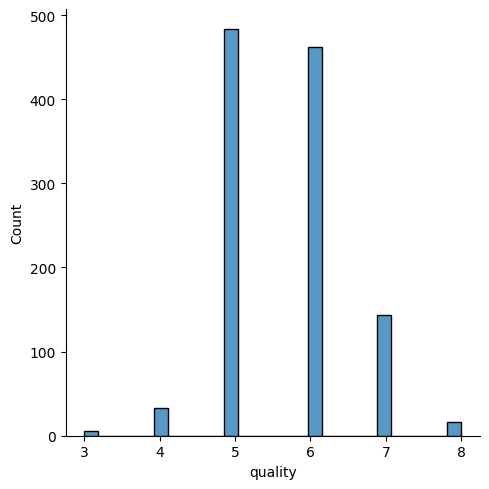

In [17]:
sb.displot(wine['quality'])

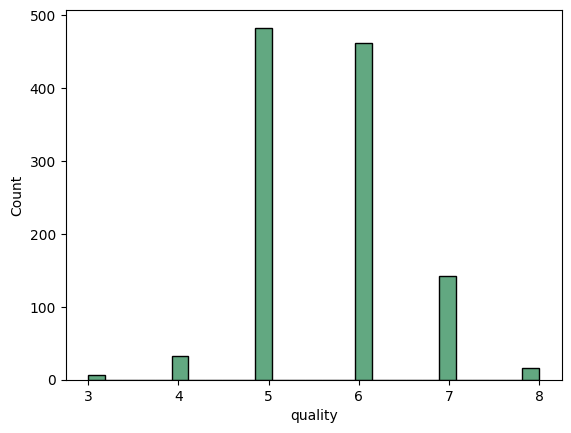

In [20]:
sb.histplot(wine['quality'],color='seagreen')
pt.show()

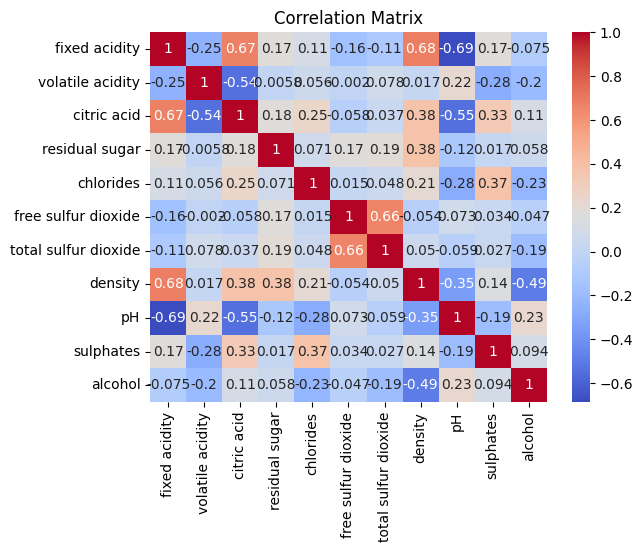

In [21]:
co_matrix=wine[['fixed acidity','volatile acidity','citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].corr()
sb.heatmap(co_matrix,annot=True,cmap='coolwarm')
pt.title('Correlation Matrix')
pt.show()

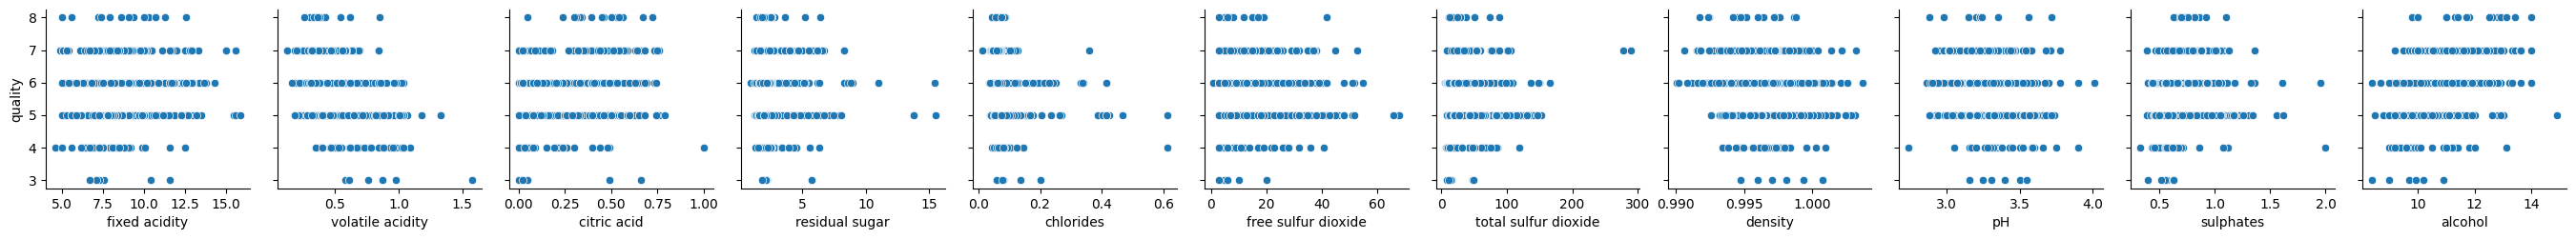

In [22]:
sb.pairplot(wine,x_vars=['fixed acidity','volatile acidity','citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],y_vars='quality',kind='scatter')
pt.show()

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [25]:
winelr=LinearRegression()

In [27]:
winelr.fit(xtrain,ytrain)

LinearRegression()

In [29]:
winelr.coef_

array([ 5.16469115e-02, -1.04921452e+00, -1.68288217e-01,  2.78808895e-02,
       -1.87001218e+00,  2.01442362e-03, -3.06060704e-03, -3.08169955e+01,
       -2.07455092e-01,  9.97073029e-01,  2.72714660e-01])

In [30]:
pd.DataFrame(winelr.coef_,index=x.columns,columns=['mycoef'])

,mycoef
fixed acidity,0.051647
volatile acidity,-1.049215
citric acid,-0.168288
residual sugar,0.027881
chlorides,-1.870012
free sulfur dioxide,0.002014
total sulfur dioxide,-0.003061
density,-30.816995
pH,-0.207455
sulphates,0.997073


In [31]:
pr=winelr.predict(xtest)

In [32]:
r2_score(ytest,pr)

0.34914969120166794

In [33]:
mean_absolute_error(ytest,pr)

0.5075937819140476

In [34]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [35]:
winelr.predict([[8,0.5,0.15,1.9,0.07,23.0,35.0,0.92,3.5,0.65,10.2]])

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.02625662])